In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Loading the Image


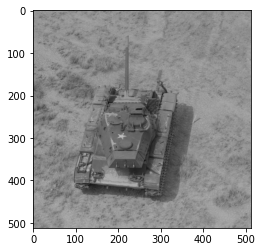

In [2]:
img = cv2.imread('../../tank_img.tiff')
plt.imsave('tank.png', img)
plt.imshow(img);

### Custom class for Sobel Filter

In [3]:
class FirstOrderDerivative_SobelFilter(object):
    ''' 
    Class for First Order Derivative Filter 
    Type of First Order Derivative Filter used: Sobel Gradient
    '''
    def sharpen(self, image: np.ndarray) -> np.ndarray:
        filter_X = image.copy()
        filter_Y = image.copy()
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]): 
                # Compute Sobel_X (Gx)
                if i+1 < image.shape[0] and j+1 < image.shape[1]:
                    filter_X[i, j] = image[i + 1, j + 1] - image[i, j]
                else:
                    filter_X[i, j] = -image[i, j]                
                
                # Compute Sobel_Y (Gy)
                if i+1 < image.shape[0] or j+1 < image.shape[1]:
                    if i+1 < image.shape[0] and j+1 < image.shape[1]:
                        filter_Y[i, j] = image[i + 1, j] - image[i, j + 1]
                    elif i+1 < image.shape[0]:
                        filter_Y[i, j] = image[i + 1, j]
                    else:
                        filter_Y[i, j] = -image[i, j + 1]

        return filter_X, filter_Y

### Sharpening using 1st-Order Derivative Filter (using Sobel Gradient)


X and Y Gradients

In [4]:
sobel_X, sobel_Y = FirstOrderDerivative_SobelFilter().sharpen(img)

plt.imsave('sobel_X.png', sobel_X)
plt.imsave('sobel_Y.png', sobel_Y)

Edge Mask

In [ ]:
sobel_edge_mask = np.sqrt(np.square(sobel_X) + np.square(sobel_Y))
sobel_edge_mask = sobel_edge_mask.astype(np.uint8)

plt.imsave('sobel_edge_mask.png', sobel_edge_mask)

Sharp image

In [ ]:
sobel_sharp_img = img + sobel_edge_mask

plt.imsave('sobel_sharp_image.png', sobel_sharp_img)

### Inbuilt Algorithm

In [ ]:
# Sobel X
sobel_X_cv = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  

# Sobel Y
sobel_Y_cv = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) 

# sobel_edge_mask_cv = sobel_X_cv + sobel_Y_cv
sobel_edge_mask_cv = np.sqrt(np.square(sobel_X_cv) + np.square(sobel_Y_cv))

sobel_sharp_img_cv = img + sobel_edge_mask_cv

plt.imsave('sobel_X_cv.png', sobel_X)
plt.imsave('sobel_Y_cv.png', sobel_Y)
plt.imsave('sobel_edge_mask_cv.png', sobel_edge_mask)
plt.imsave('sobel_sharp_image_cv.png', sobel_sharp_img)